In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load data into a Pandas DataFrame
advertising_df= pd.read_csv('advertising.csv', index_col=0)

In [3]:
advertising_df

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
...,...,...,...,...,...
1195,13.80,149.7,35.6,6.0,17.3
1196,8.10,38.2,3.7,13.8,7.6
1197,6.40,94.2,4.9,8.1,9.7
1196,8.10,38.2,3.7,13.8,7.6


In [4]:
# Descriptive statistics
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


<Axes: >

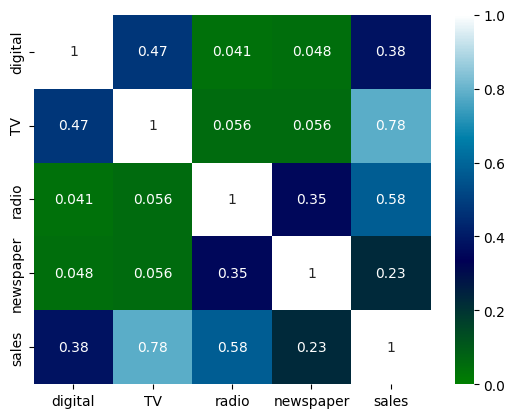

In [5]:
# Correlation heatmap
sns.heatmap(advertising_df.corr(), annot=True, vmin=0, vmax=1, cmap='ocean')

In [6]:
# Split: X (features) and y (target)
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [7]:
# Feature normalization
normalized_feature =  keras.utils.normalize(X.values)
normalized_feature

array([[0.89211961, 0.4032179 , 0.0977028 , 0.17886333],
       [0.66254734, 0.45658693, 0.39008405, 0.44765371],
       [0.29009225, 0.20576311, 0.51609436, 0.77920128],
       ...,
       [0.06744611, 0.99272247, 0.05163843, 0.08536149],
       [0.19480049, 0.91868871, 0.08898294, 0.33188231],
       [0.06744611, 0.99272247, 0.05163843, 0.08536149]])

In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=419)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((899, 4), (300, 4), (899,), (300,))

In [9]:
# Model architecture (one hidden layer)
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#  Fit model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=32)

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 16886.8438 - mse: 16886.8438 - val_loss: 8142.2417 - val_mse: 8142.2417
Epoch 2/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7355.5420 - mse: 7355.5420 - val_loss: 3883.1550 - val_mse: 3883.1550
Epoch 3/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3498.6372 - mse: 3498.6372 - val_loss: 2065.8965 - val_mse: 2065.8965
Epoch 4/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1974.7109 - mse: 1974.7109 - val_loss: 1133.1787 - val_mse: 1133.1787
Epoch 5/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1002.6220 - mse: 1002.6220 - val_loss: 653.0952 - val_mse: 653.0952
Epoch 6/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 582.1774 - mse: 582.1774 - val_loss: 419.2709 - val_mse: 419.2709
Epoch 7/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 400.1031 - mse: 400.1031 - val_loss: 323.6027 - val_mse: 323.6027
Epoch 8/32
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 317.9035 - mse: 317.9035 - val_loss: 252.4198 - val_mse: 252.419

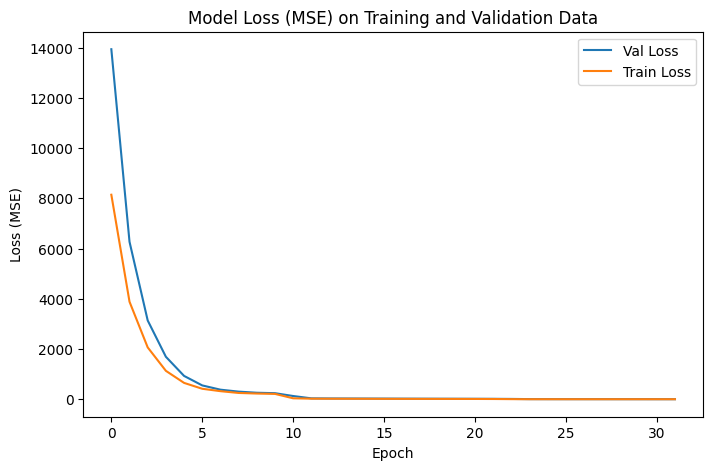

In [10]:
# Training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

In [11]:
# Evaluate model
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_train, pred_train)))
print(np.sqrt(mean_squared_error(y_test, pred_test)))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1.9412601563218215
1.747400783229702


In [12]:
# Benchmarking with linear regression

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.7382105956224896
